In [46]:
# importação das bibliotecas

import numpy as np # biblioteca algebra em python
from scipy import stats # biblioteca com funções estátisticas

In [47]:
# biblioteca para plotagem dos gráficos

import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import matplotlib

In [48]:
# definindo parametros gráfico e valores do teste

figsize(20, 6)
x = np.linspace(-5, 5, 10000)
y = stats.norm.pdf(x)
n_tests = 1000

# Valores aleatórios

x_random = np.random.randn(1000)


# valores aleatórios não significativos em p = 0.05

x_random_nonsig = [x for x in x_random if abs(x) < stats.norm.ppf(0.975)]
y_constant_nonsig = [0.0 for _ in range(len(x_random_nonsig))]


# valores aleatórios significativos em p = 0.05

x_random_sig = [x for x in x_random if abs(x) > stats.norm.ppf(0.975)]
y_constant_sig = [0.00 for _ in range(len(x_random_sig))]

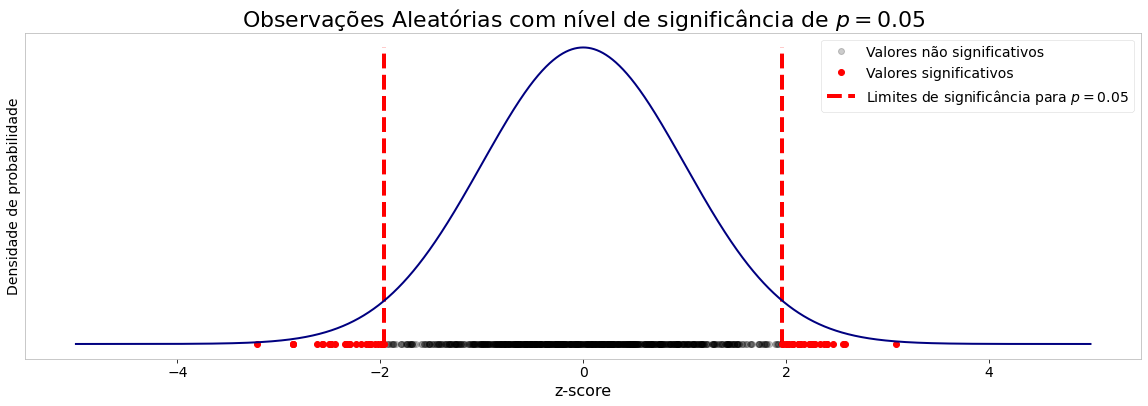

In [49]:
plt.plot(x_random_nonsig, y_constant_nonsig, 'ko', label = 'Valores não significativos', alpha = 0.2)
plt.plot(x_random_sig, y_constant_sig, 'ro', label = 'Valores significativos')
plt.plot(x, y, '-', color = 'navy'); plt.xlabel('z-score', size =16); plt.ylabel('Densidade de probabilidade');
plt.vlines([stats.norm.ppf(0.975), stats.norm.ppf(0.025)],linestyles='--',
           color = 'red', linewidth=4,
           ymin = 0, ymax = y.max(), label='Limites de significância para $p = 0.05$')
plt.yticks([])
plt.legend(prop={'size': 14});
plt.title('Observações Aleatórias com nível de significância de $p=0.05$', size = 22); 

In [50]:
# Valores aleatórios não significativos para p = 0.05 com correção

x_random_nonsig = [x for x in x_random if abs(x) < stats.norm.ppf(1 - (0.025/n_tests))]
y_constant_nonsig = [0.0 for _ in range(len(x_random_nonsig))]


# valores aleatórios significativos para p = 0.05 com correção

x_random_sig = [x for x in x_random if abs(x) > stats.norm.ppf(1 - (0.025/n_tests))]
y_constant_sig = [0.0 for _ in range(len(x_random_sig))]

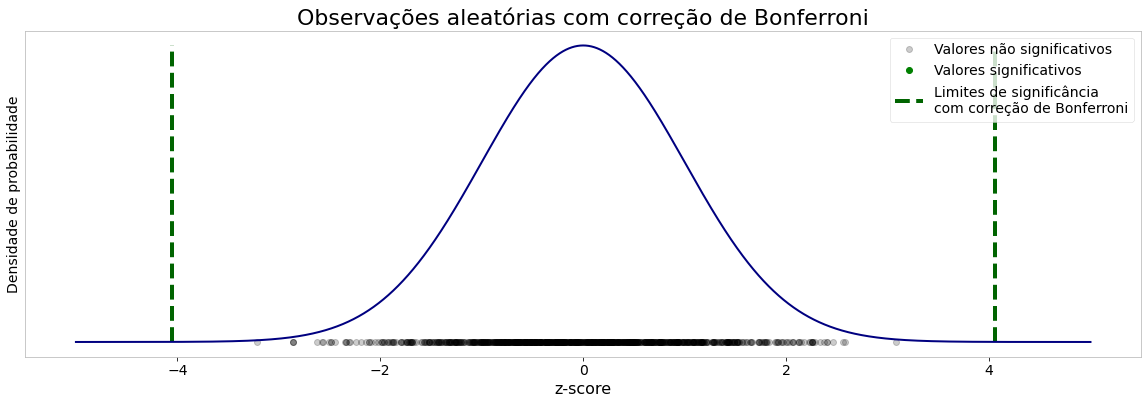

In [51]:
plt.plot(x_random_nonsig, y_constant_nonsig, 'ko', label = 'Valores não significativos', alpha = 0.2)
plt.plot(x_random_sig, y_constant_sig, 'go', label = 'Valores significativos')
plt.plot(x, y, '-', color = 'navy'); plt.xlabel('z-score', size = 16); 
plt.ylabel('Densidade de probabilidade'); plt.yticks([])
plt.vlines([stats.norm.ppf(1 - (0.025/n_tests)), stats.norm.ppf(0.025/n_tests)],linestyles='--',
           color = 'darkgreen', linewidth=4,
           ymin = 0, ymax = y.max(), label='Limites de significância \ncom correção de Bonferroni')
plt.legend(prop={'size': 14});
plt.title('Observações aleatórias com correção de Bonferroni', size = 22);